In [1]:
import distillation.amundson_1958 as am
model = am.Model(
    components=['Benzene', 'Toluene'],
    F=100., # kmol/h
    P=112000, # Pa
    P_drop = 0, # Pa
    z_feed = [0.7, 0.3],
    E = [1. for i in range(36)],
    RR=0.924,
    D=63.636,
    N=34,
    feed_stage=22,
)

In [2]:
model.add_parameters(verbose=True)



Setting Raoult's parameters for Benzene:
                A [dimensionless]: 6.81432
                B [dimensionless]: 1090.4312
                C [dimensionless]: 197.146
     K value at 300 K, 1 bar=  0.11779847281612855
Setting Raoult's parameters for Toluene:
                A [dimensionless]: 7.13657
                B [dimensionless]: 1457.2871
                C [dimensionless]: 231.827
     K value at 300 K, 1 bar=  0.04244789824876264
Setting heat capacity constants for Benzene (taken from Perrys):
            1: 78.12944
            2: -169.5
            3: 0.64781
            4: 0.0
            5: 0.0
             value at 300K [J/kmol/K]= 7531.029439999998
Setting heat capacity constants for Toluene (taken from Perrys):
            1: 140140.0
            2: -152.3
            3: 0.695
            4: 0.0
            5: 0.0
             value at 300K [J/kmol/K]= 157000.0
Setting heat capacity for Benzene to be 4R (ideal polyatomic gas)
Setting heat capacity for Toluene to be 4

In [3]:
print(model.T_feed)
model.T_feed = model.bubble_T_feed()
print(model.T_feed)

300.0
362.789430622042


In [4]:
for i in model.stages:
    model.T[i] = model.T_feed
print(model.T)

[362.78943062 362.78943062 362.78943062 362.78943062 362.78943062
 362.78943062 362.78943062 362.78943062 362.78943062 362.78943062
 362.78943062 362.78943062 362.78943062 362.78943062 362.78943062
 362.78943062 362.78943062 362.78943062 362.78943062 362.78943062
 362.78943062 362.78943062 362.78943062 362.78943062 362.78943062
 362.78943062 362.78943062 362.78943062 362.78943062 362.78943062
 362.78943062 362.78943062 362.78943062 362.78943062 362.78943062]


In [5]:
print(model.L)
print(model.V)
model.initialize_flow_rates()
print(model.L)
print(model.V)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 58.799664  58.799664  58.799664  58.799664  58.799664  58.799664
  58.799664  58.799664  58.799664  58.799664  58.799664  58.799664
  58.799664  58.799664  58.799664  58.799664  58.799664  58.799664
  58.799664  58.799664  58.799664  58.799664 158.799664 158.799664
 158.799664 158.799664 158.799664 158.799664 158.799664 158.799664
 158.799664 158.799664 158.799664 158.799664  36.364   ]
[  0.       122.435664 122.435664 122.435664 122.435664 122.435664
 122.435664 122.435664 122.435664 122.435664 122.435664 122.435664
 122.435664 122.435664 122.435664 122.435664 122.435664 122.435664
 122.435664 122.435664 122.435664 122.435664 122.435664 122.435664
 122.435664 122.435664 122.435664 122.435664 122.435664 122.435664
 122.435664 122.435664 122.435664 122.435664 122.435664]


In [6]:
model.update_K_values()

In [7]:
for i in model.components:
    print(i, model.l[i])
for i in model.components:
    model.solve_component_mass_bal(i)
for i in model.components:
    print(i, model.l[i])

Benzene [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Toluene [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Benzene [ 55.88029293  45.65708691  41.64561699  40.07156175  39.45392035
  39.21156488  39.11646735  39.07915216  39.0645101   39.05876472
  39.0565103   39.05562569  39.05527858  39.05514238  39.05508894
  39.05506797  39.05505974  39.05505651  39.05505524  39.05505475
  39.05505455  39.05505447 105.47559461 101.68236912  97.66261191
  93.40279449  88.88858044  84.10477717  79.0352848   73.66304195
  67.96996834  61.93690394  55.54354445  48.76837304   9.5234925 ]
Toluene [ 0.64649213  1.35380586  2.06513752  2.78050994  3.49994607  4.22346899
  4.95110193  5.68286821  6.41879134  7.15889491  7.90320268  8.65173853
  9.40452647 10.16159067 10.92295541 11.68864512 12.45868436 13.23309786
 14.01191045 14.79514713 15.58283302 16.37499341 46.37531326 46.376181

In [8]:
print(model.T)
for stage in model.stages:
    model.T[stage] = model.bubble_T(stage)
print(model.T)

[362.78943062 362.78943062 362.78943062 362.78943062 362.78943062
 362.78943062 362.78943062 362.78943062 362.78943062 362.78943062
 362.78943062 362.78943062 362.78943062 362.78943062 362.78943062
 362.78943062 362.78943062 362.78943062 362.78943062 362.78943062
 362.78943062 362.78943062 362.78943062 362.78943062 362.78943062
 362.78943062 362.78943062 362.78943062 362.78943062 362.78943062
 362.78943062 362.78943062 362.78943062 362.78943062 362.78943062]
[356.54101975 356.87975667 357.24436075 357.5976039  357.93410227
 358.25740126 358.57117802 358.87774811 359.1783812  359.47375243
 359.76423526 360.05005806 360.3313809  360.60833142 360.8810212
 361.14955298 361.41402395 361.67452722 361.93115248 362.18398643
 362.43311294 362.67861323 362.92056601 363.11172327 363.32695072
 363.57091326 363.84996069 364.17353751 364.55761539 365.03355186
 365.67139841 366.63905112 368.32811417 371.46198186 376.50018306]


In [9]:
print(model.T_is_converged())

False


In [10]:
iter = 0
while not model.T_is_converged():
    model.update_K_values()
    for i in model.components:
        model.solve_component_mass_bal(i)
    for stage in model.stages:
        model.T[stage] = model.bubble_T(stage)
    print(iter, model.T)
    iter += 1

0 [356.40322523 356.5345411  356.69464734 356.88553294 357.10811001
 357.36230039 357.64703026 357.96018646 358.29860809 358.65814837
 359.03380969 359.4199372  359.81044896 360.19907902 360.57961225
 360.94609387 361.29300239 361.61538055 361.9089237  362.1700294
 362.39581427 362.58410578 362.73341617 362.78695764 362.88075787
 363.0250537  363.23541486 363.53779458 363.9795224  364.65259408
 365.73760435 367.55963406 370.55197639 374.85377504 379.66499613]
1 [356.38568007 356.48953136 356.61733776 356.77300507 356.96027568
 357.18233912 357.44136719 357.73802305 358.07102228 358.43684048
 358.82965584 359.24158049 359.66317707 360.08419437 360.49440811
 360.88443588 361.24641279 361.57445509 361.86488849 362.1162598
 362.32917774 362.50603903 362.65069398 362.62932734 362.62812238
 362.65997455 362.74568345 362.92195048 363.25799827 363.88741991
 365.05677266 367.15166706 370.54740454 375.12312842 379.91620111]
2 [356.38174907 356.47941785 356.59978827 356.7468784  356.92476602
 357

In [11]:
print(model.L)
print(model.V)
model.solve_energy_balances()
print(model.L)
print(model.V)

[ 58.799664  58.799664  58.799664  58.799664  58.799664  58.799664
  58.799664  58.799664  58.799664  58.799664  58.799664  58.799664
  58.799664  58.799664  58.799664  58.799664  58.799664  58.799664
  58.799664  58.799664  58.799664  58.799664 158.799664 158.799664
 158.799664 158.799664 158.799664 158.799664 158.799664 158.799664
 158.799664 158.799664 158.799664 158.799664  36.364   ]
[  0.       122.435664 122.435664 122.435664 122.435664 122.435664
 122.435664 122.435664 122.435664 122.435664 122.435664 122.435664
 122.435664 122.435664 122.435664 122.435664 122.435664 122.435664
 122.435664 122.435664 122.435664 122.435664 122.435664 122.435664
 122.435664 122.435664 122.435664 122.435664 122.435664 122.435664
 122.435664 122.435664 122.435664 122.435664 122.435664]
[ 58.799664   -21.70456548 -21.6983381  -21.69099362 -21.6824975
 -21.67289845 -21.6623591  -21.65117868 -21.63979636 -21.62876411
 -21.61868436 -21.61012013 -21.6034984  -21.59903568 -21.59670913
 -21.59628081 -21.5

In [12]:
print(model.flow_rates_converged())

False


In [13]:
outer_loop = 0
inner_loop = 0
while not model.flow_rates_converged():
    outer_loop += 1
    for i in model.components:
        model.solve_component_mass_bal(i)
    for stage in model.stages:
        model.T[stage] = model.bubble_T(stage)
    while not model.T_is_converged():
        inner_loop += 1
        model.update_K_values()
        for i in model.components:
            model.solve_component_mass_bal(i)
        for stage in model.stages:
            model.T[stage] = model.bubble_T(stage)
    model.solve_energy_balances()
    print(outer_loop, inner_loop, model.V)
    if outer_loop > 1000:
        break

1 24 [ 0.00000000e+00  9.11570944e+01 -6.03428829e+05  1.75753837e+02
  3.63995432e+02  2.34191139e+02  2.87157327e+02  2.57038848e+02
  2.71874589e+02  2.63854013e+02  2.68157055e+02  2.65630087e+02
  2.67340918e+02  2.65939584e+02  2.67417798e+02  2.65757190e+02
  2.68018091e+02  2.65328739e+02  2.69417472e+02  2.64801818e+02
  2.72768582e+02  2.64670641e+02  2.82316990e+02  2.58470340e+02
  2.66536428e+02  2.74538932e+02  2.82427360e+02  2.90152300e+02
  2.97648354e+02  3.04804442e+02  3.11418210e+02  3.17166897e+02
  3.21746562e+02  3.25384887e+02  3.29118425e+02]
2 37 [  0.          81.21765828  81.22508997  89.52440412  92.42701734
  96.44322744  98.9962012  101.32945944 103.0568457  104.46230375
 105.53669732 106.37885156 107.02358117 107.52172531 107.89961597
 108.18717678 108.39700892 108.54361411 108.62242362 108.62513759
 108.51155757 108.22461053 107.65845388 112.24988666 115.91649202
 119.49964337 123.00470618 126.43833325 129.80964028 133.13301917
 136.43625171 139.788397

In [14]:
x = {}
for i in model.components:
    x[i] = model.l[i][:]/model.L[:]
print(x)

{'Benzene': array([0.99477889, 1.58495082, 1.19255568, 1.05593124, 0.99107314,
       0.95242125, 0.92408112, 0.89980134, 0.87719435, 0.85557618,
       0.83500651, 0.81580918, 0.79832238, 0.78277932, 0.76927037,
       0.75775381, 0.74809005, 0.74008148, 0.73350729, 0.7281488 ,
       0.72380499, 0.72029993, 0.717205  , 0.72622808, 0.73430837,
       0.74128961, 0.74668972, 0.74931114, 0.74640229, 0.73203821,
       0.69482563, 0.61786884, 0.49004261, 0.32993529, 0.18414506]), 'Toluene': array([0.00524495, 0.02167273, 0.0287162 , 0.03885881, 0.05164223,
       0.06684103, 0.08413795, 0.10306989, 0.12303877, 0.14336151,
       0.1633449 , 0.18236565, 0.19993388, 0.21572607, 0.22958544,
       0.24149774, 0.25155458, 0.25991538, 0.26677466, 0.27233763,
       0.27680392, 0.280358  , 0.28305406, 0.27405169, 0.26598548,
       0.25900929, 0.25360344, 0.25096479, 0.25384607, 0.26817589,
       0.30535316, 0.38227738, 0.51007272, 0.67015328, 0.81581323])}


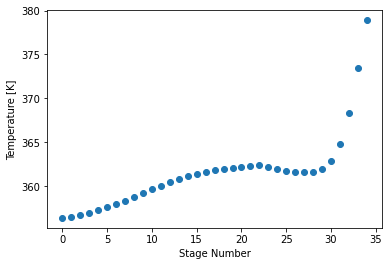

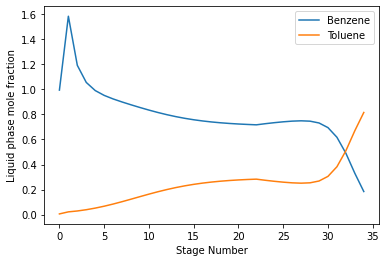

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(model.stages, model.T, 'o')
ax.set_xlabel('Stage Number')
ax.set_ylabel('Temperature [K]')

# plot liquid-phase mole fractions
fig2 = plt.figure(2)
ax2 = fig2.add_subplot(111)
# calculate mole fractions
for i in model.components:
    ax2.plot(model.stages, x[i], label=i)
ax2.set_ylabel('Liquid phase mole fraction')
ax2.set_xlabel('Stage Number')
ax2.legend()

